In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
train.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train.describe(include=['object', 'bool'])


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,False,Ankalik Nateansive,True
freq,1,4602,5439,8,5915,8291,2,4378


Большинство с Земли
Большинство не в криосне
Каюта G/734/S самая частоиспользуемая (8 пассажиров)
Большинство направлялось в TRAPPIST-1e
Почти все пассажиры не vip
Ankalik Nateansive записан дважды

In [ ]:
train.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Зависимости между Features и Transported

In [ ]:
transported = train[train["Transported"] == 1]

print(f"Transported {len(transported)} ({len(transported)/len(train)*100:.2f}%)")


Transported 4378 (50.36%)


VIP vs Transported

In [ ]:
train[['VIP', 'Transported']].dropna().groupby('VIP', as_index=False).mean()


,VIP,Transported
0,False,0.506332
1,True,0.381910


<Axes: xlabel='VIP', ylabel='Transported'>

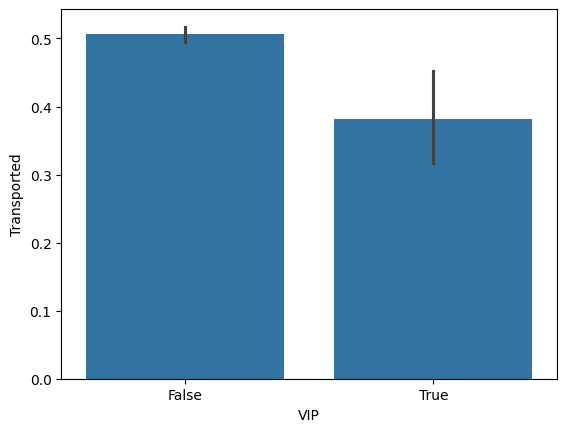

In [ ]:
sns.barplot(x='VIP', y='Transported', data=train)


Пассажиры без vip в среднем транспортированы чаще

HomePlanet vs Transported

In [ ]:
train[['HomePlanet', 'Transported']].dropna().groupby('HomePlanet', as_index=False).mean()


,HomePlanet,Transported
0,Earth,0.423946
1,Europa,0.658846
2,Mars,0.523024


<Axes: xlabel='HomePlanet', ylabel='Transported'>

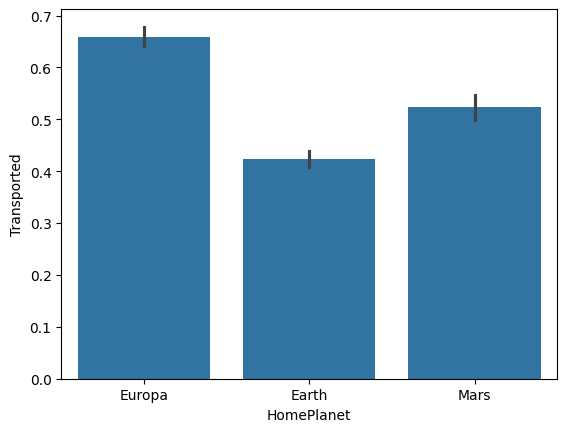

In [ ]:
sns.barplot(x='HomePlanet', y='Transported', data=train)


Пассажиры с Земли с меньшей вероятностью были транспортированы, а с Европы наоборот с большей

CryoSleep vs Transported

<Axes: xlabel='CryoSleep', ylabel='Transported'>

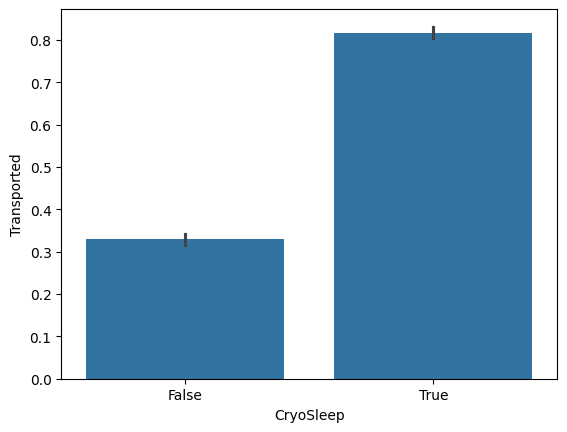

In [ ]:
sns.barplot(x='CryoSleep', y='Transported', data=train)


Пассажиры в криосне имели больше шансов на транспортировку

Destination vs Transported

<Axes: xlabel='Destination', ylabel='Transported'>

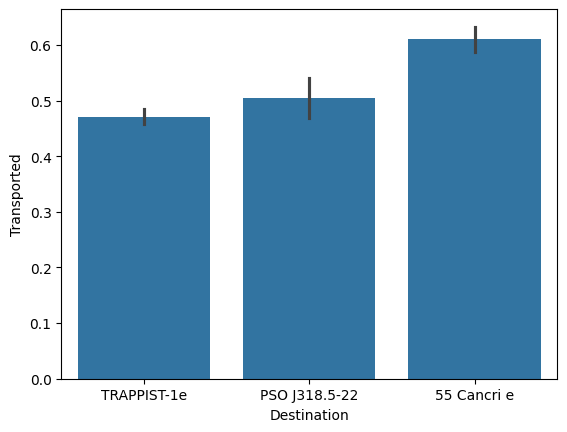

In [ ]:
sns.barplot(x='Destination', y='Transported', data=train)


Пассажиры с наиболее популярным местом прибытия реже транспортировались по сравнению с теми, чье место прибытия 55 Cancri e

CryoSleep + HomePlanet vs Transported

<Axes: xlabel='HomePlanet', ylabel='Transported'>

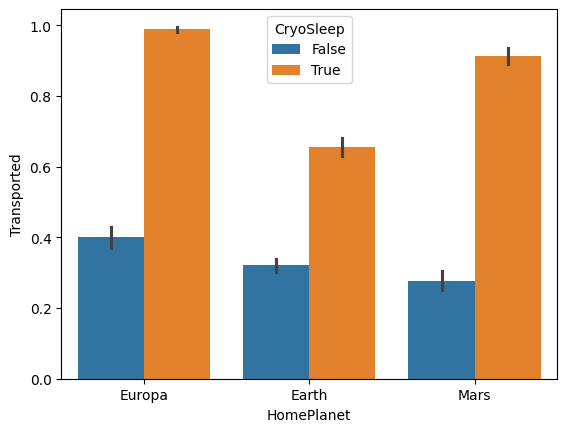

In [ ]:
sns.barplot(data=train, x="HomePlanet", y="Transported", hue="CryoSleep")


Пассажиры с Европы и в криосне перемещались почти всегда.

Реже всех перемещались пассажиры с Марси без криосна.

Заметно, что пассажиры с Земли в криосне перемещались существенно реже, чем с других планет

Destination + HomePlanet vs Transported

<Axes: xlabel='HomePlanet', ylabel='Transported'>

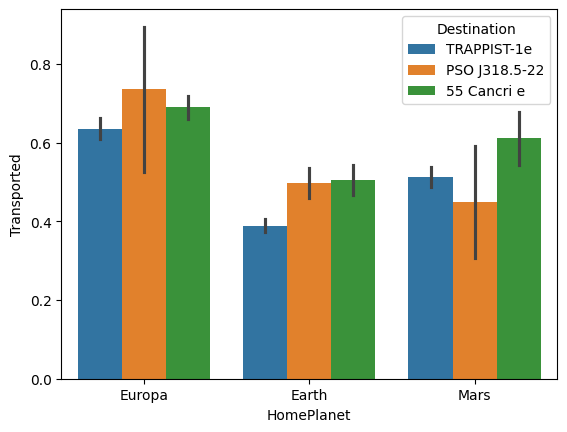

In [ ]:
sns.barplot(data=train, x="HomePlanet", y="Transported", hue="Destination")


Наибольшие шансы на транспортировку у пассажиров с Европы и пунктом назначения PSO j318.5-22
Наименьшие у тех, кто с Земли и местом прибытия TRAPPIST-1e

VIP + CryoSleep vs Transported

<Axes: xlabel='VIP', ylabel='Transported'>

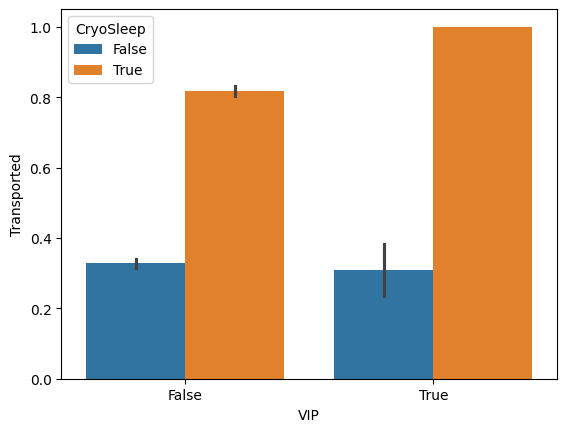

In [ ]:
sns.barplot(data=train, x="VIP", y="Transported", hue="CryoSleep")


VIP не сильно влияет на транспортировку, криосон влияет намного больше

Age vs Transported

<Axes: xlabel='HomePlanet', ylabel='Age'>

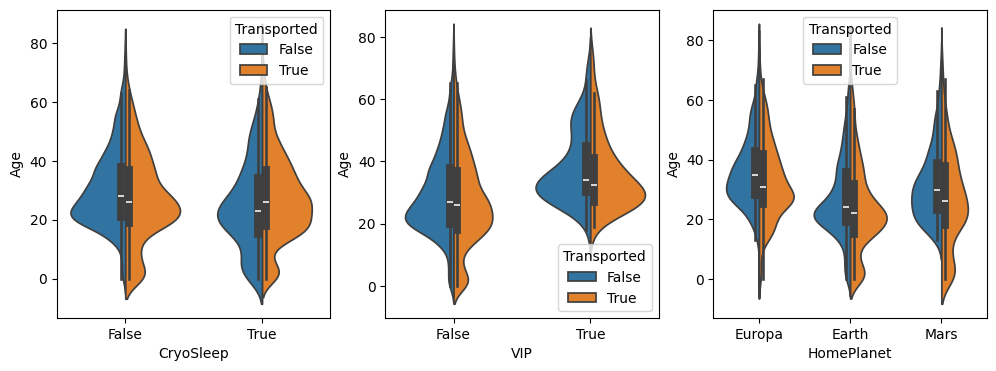

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="CryoSleep", y="Age", hue="Transported", data=train, split=True, ax=ax1)
sns.violinplot(x="VIP", y="Age", hue="Transported", data=train, split=True, ax=ax2)
sns.violinplot(x="HomePlanet", y="Age", hue="Transported", data=train, split=True, ax=ax3)


Не похоже, чтобы возраст влиял на транспортировку

<Axes: >

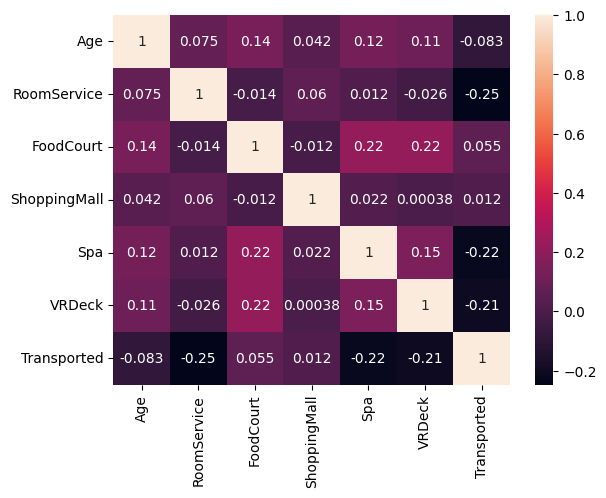

In [ ]:
corr_matrix = train.dropna().select_dtypes(include=['number', 'bool']).corr()

sns.heatmap(corr_matrix, annot=True)


Корреляций нет

Cabin vs Transported

<Axes: xlabel='count', ylabel='mean'>

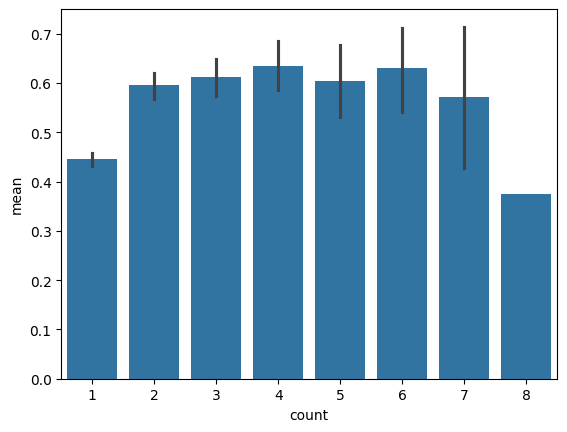

In [ ]:
cabins = train['Cabin'].value_counts()
sorted_by_cabin = train.groupby('Cabin')['Transported'].agg(['count', 'mean']).sort_values(by='count')

sns.barplot(data=sorted_by_cabin, x="count", y="mean")


Группы средних размеров транспортировались чаще